In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
footfall = pd.read_csv('footfall.xlsx')

In [29]:
footfall

,Unnamed: 0,Date,footfall
0,0,2016-01-03 00:00:00+00:00,10840
1,1,2016-01-10 00:00:00+00:00,23470
2,2,2016-01-17 00:00:00+00:00,37370
3,3,2016-01-24 00:00:00+00:00,28940
4,4,2016-01-31 00:00:00+00:00,38630
...,...,...,...
208,208,2019-12-29 00:00:00+00:00,12850
209,209,2020-01-05 00:00:00+00:00,14120
210,210,2020-01-12 00:00:00+00:00,10110
211,211,2020-01-19 00:00:00+00:00,9560


In [5]:
apparel = pd.read_csv('apparel.csv')

In [6]:
apparel

,Date,Qty,List_price,Promotion,Cost,price paid,order_no,brand,description,supplier,subfamily,section,size,color
0,2016-01-01T00:00:00Z,1,1315.200000,0.1875,419.349,1068.600000,AB11970491,Demilde یاسمی,item 1,Elise Gautier,jackets,outdoors,Medium,Blue
1,2016-01-01T00:00:00Z,1,95.200000,0.1875,16.934,77.350000,AB11971241,Elisa Rodriguez,item 2,Saana Besten,jackets,outdoors,small,Blue
2,2016-01-01T00:00:00Z,1,150.200000,0.1875,31.299,122.037500,AB11970491,Elisa Rodriguez,item 3,Saana Besten,jackets,outdoors,large,Blue
3,2016-01-01T00:00:00Z,1,710.200000,0.1875,223.114,577.037500,AB11970491,Demilde یاسمی,item 4,Elise Gautier,jackets,outdoors,large,Black
4,2016-01-01T00:00:00Z,1,95.200000,0.0625,21.419,89.250000,AB11971241,Latife Meijerman,item 5,Eemeli Ertürk,shorts,swimming,18,Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217549,2020-01-25T00:00:00Z,1,100.200000,0.0000,25.319,100.200000,AB14124821,Norbert Van der Mierden,item 3274,Nora Petersen,shorts,swimming,Medium,Black
217550,2020-01-25T00:00:00Z,1,119.247619,0.0400,31.494,114.477714,AB14125361,Norbert Van der Mierden,item 5052,Nora Petersen,shorts,swimming,14,Black
217551,2020-01-25T00:00:00Z,1,189.723810,0.0400,66.724,182.134858,AB14125361,Micheal Korol,item 5262,Angie Myers,Pefumes,outing,Standard,Standard
217552,2020-01-25T00:00:00Z,1,176.390476,0.0400,50.084,169.334857,AB14125361,Terri da Rosa,item 5107,Matias Fernandes,Pefumes,outing,Standard,Standard


In [8]:
apparel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217554 entries, 0 to 217553
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         217554 non-null  object 
 1   Qty          217554 non-null  int64  
 2   List_price   217554 non-null  float64
 3   Promotion    217554 non-null  float64
 4   Cost         217554 non-null  float64
 5   price paid   217554 non-null  float64
 6   order_no     217554 non-null  object 
 7   brand        217552 non-null  object 
 8   description  217552 non-null  object 
 9   supplier     217517 non-null  object 
 10  subfamily    217554 non-null  object 
 11  section      217554 non-null  object 
 12  size         217554 non-null  object 
 13  color        217554 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 23.2+ MB


In [9]:
# convert Date in apparel from object to Date

In [10]:
apparel['Date'] = pd.to_datetime(apparel['Date'])

In [11]:
apparel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217554 entries, 0 to 217553
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Date         217554 non-null  datetime64[ns, UTC]
 1   Qty          217554 non-null  int64              
 2   List_price   217554 non-null  float64            
 3   Promotion    217554 non-null  float64            
 4   Cost         217554 non-null  float64            
 5   price paid   217554 non-null  float64            
 6   order_no     217554 non-null  object             
 7   brand        217552 non-null  object             
 8   description  217552 non-null  object             
 9   supplier     217517 non-null  object             
 10  subfamily    217554 non-null  object             
 11  section      217554 non-null  object             
 12  size         217554 non-null  object             
 13  color        217554 non-null  object             
dtypes: d

In [34]:
weekly_orders = apparel.groupby('Date').agg(total_orders = ('order_no','count')).resample('W').sum().reset_index()

In [35]:
weekly_orders

,Date,total_orders
0,2016-01-03 00:00:00+00:00,1118
1,2016-01-10 00:00:00+00:00,2401
2,2016-01-17 00:00:00+00:00,3788
3,2016-01-24 00:00:00+00:00,2964
4,2016-01-31 00:00:00+00:00,3929
...,...,...
208,2019-12-29 00:00:00+00:00,1322
209,2020-01-05 00:00:00+00:00,1428
210,2020-01-12 00:00:00+00:00,1006
211,2020-01-19 00:00:00+00:00,898


In [28]:
footfall.columns

Index(['Unnamed: 0', 'Date', 'footfall'], dtype='object')

In [37]:
#apparel['Date'] = pd.to_datetime(apparel['Date'])
footfall['Date'] = pd.to_datetime(footfall['Date'])

In [38]:
footfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  213 non-null    int64              
 1   Date        213 non-null    datetime64[ns, UTC]
 2   footfall    213 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2)
memory usage: 5.1 KB


In [36]:
weekly_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          213 non-null    datetime64[ns, UTC]
 1   total_orders  213 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 3.5 KB


In [42]:
joined = pd.merge(weekly_orders,footfall,how='left').drop('Unnamed: 0',axis=1)
joined

,Date,total_orders,footfall
0,2016-01-03 00:00:00+00:00,1118,10840
1,2016-01-10 00:00:00+00:00,2401,23470
2,2016-01-17 00:00:00+00:00,3788,37370
3,2016-01-24 00:00:00+00:00,2964,28940
4,2016-01-31 00:00:00+00:00,3929,38630
...,...,...,...
208,2019-12-29 00:00:00+00:00,1322,12850
209,2020-01-05 00:00:00+00:00,1428,14120
210,2020-01-12 00:00:00+00:00,1006,10110
211,2020-01-19 00:00:00+00:00,898,9560


In [44]:
joined['conversion_rate'] = joined.total_orders/joined.footfall
joined

,Date,total_orders,footfall,conversion_rate
0,2016-01-03 00:00:00+00:00,1118,10840,0.103137
1,2016-01-10 00:00:00+00:00,2401,23470,0.102301
2,2016-01-17 00:00:00+00:00,3788,37370,0.101365
3,2016-01-24 00:00:00+00:00,2964,28940,0.102419
4,2016-01-31 00:00:00+00:00,3929,38630,0.101709
...,...,...,...,...
208,2019-12-29 00:00:00+00:00,1322,12850,0.102879
209,2020-01-05 00:00:00+00:00,1428,14120,0.101133
210,2020-01-12 00:00:00+00:00,1006,10110,0.099505
211,2020-01-19 00:00:00+00:00,898,9560,0.093933


In [47]:
joined['conversion_rate'] = joined['total_orders']/joined['footfall']
joined

,Date,total_orders,footfall,conversion_rate
0,2016-01-03 00:00:00+00:00,1118,10840,0.103137
1,2016-01-10 00:00:00+00:00,2401,23470,0.102301
2,2016-01-17 00:00:00+00:00,3788,37370,0.101365
3,2016-01-24 00:00:00+00:00,2964,28940,0.102419
4,2016-01-31 00:00:00+00:00,3929,38630,0.101709
...,...,...,...,...
208,2019-12-29 00:00:00+00:00,1322,12850,0.102879
209,2020-01-05 00:00:00+00:00,1428,14120,0.101133
210,2020-01-12 00:00:00+00:00,1006,10110,0.099505
211,2020-01-19 00:00:00+00:00,898,9560,0.093933


In [48]:
joined.conversion_rate.describe()

count    213.000000
mean       0.101910
std        0.002199
min        0.081686
25%        0.101445
50%        0.102047
75%        0.102830
max        0.105486
Name: conversion_rate, dtype: float64

In [30]:
import matplotlib.pyplot as plt

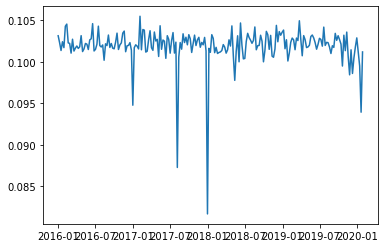

In [49]:
plt.plot(joined.Date,joined.conversion_rate)